In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads (1).csv to Social_Network_Ads (1).csv


In [3]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads (1).csv']))

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


train-test-split method (knn)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print(knn.predict(X_test))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [10]:
print(knn.score(X_test, y_test))

0.93


In [11]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [12]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(i)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

0
1
2
3
4
5
6
7


In [13]:
print(train_accuracy)

[1.         0.92       0.91333333 0.90666667 0.91       0.91333333
 0.90666667 0.91      ]


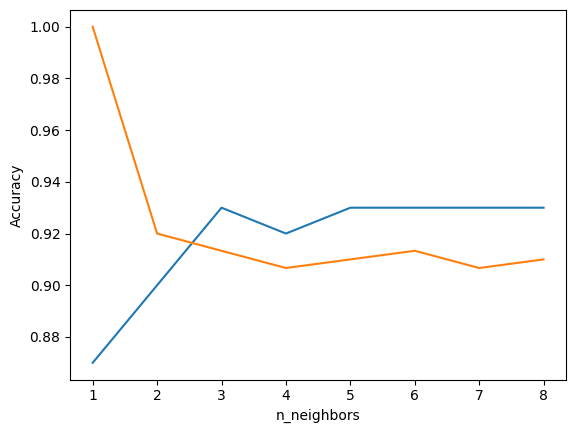

In [14]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

#plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Cross Validation Method

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [17]:
score


array([0.9125, 0.925 , 0.9125, 0.8   , 0.925 ])

In [18]:
scores

[0.8300000000000001,
 0.825,
 0.885,
 0.8825000000000001,
 0.8850000000000001,
 0.89,
 0.89,
 0.8799999999999999,
 0.8949999999999999,
 0.8899999999999999,
 0.9049999999999999,
 0.8949999999999999,
 0.8924999999999998,
 0.8924999999999998,
 0.8874999999999998,
 0.8899999999999999,
 0.8899999999999999,
 0.8899999999999999,
 0.8949999999999999,
 0.8924999999999998,
 0.8924999999999998,
 0.8924999999999998,
 0.8949999999999999,
 0.8899999999999999,
 0.8899999999999999,
 0.8924999999999998,
 0.8924999999999998,
 0.8924999999999998,
 0.8924999999999998,
 0.8949999999999999]

In [21]:


best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=11)

In [22]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625


In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])